<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>

# 1.0 Transformer Architecture
The Transformer architecture underpins countless of modern Natural Language Processing, Computer Vision, Automatic Speech recognition, time series modeling and other applications. In this notebook, we'll take a big-picture look at the Transformer architecture to allow us in the next part of this class to discuss implementation details of BERT and GPT architectures. <br>


**[1.1 Transformer Overview](#1.1-Transformer-Overview)<br>**
**[1.2 The Tokenizer](#1.2-The-Tokenizer)<br>**
**[1.3 Embedding](#1.3-Embedding)<br>**
**[1.4 Positional Encoding](#1.4-Positional-Encoding)<br>**
**[1.5 Transformer Encoder](#1.5-Transformer-Encoder)<br>**
**[1.6 What is Attention?](#1.6-What-is-Attention?)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[1.6.1 Self-Attention](#1.6.1-Self-Attention)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6.2 Multi-Head Attention](#1.6.2-Multi-Head-Attention)<br>
**[1.7 Transformer Decoder](#1.7-Transformer-Decoder)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[1.7.1 Masked Multi-Head Attention](#1.7.1-Masked-Multi-Head-Attention)<br>
**[1.8 Visualization](#1.8-Visualization)<br>**

---
# 1.1 Transformer Overview

In late 2017 a wide range of sequence-to-sequence problems, including translation, were being solved with either convolutional or recurrent neural networks (see Figure 1). What all models from that period had in common was the fact that they both extensively took advantage of the attention mechanism to allow them to process long sequences. The Transformer architecture, introduced in the  ["Attention is All You Need!"(Vaswani et al., 2017)](https://arxiv.org/abs/1706.03762) paper, presented a new approach, demonstrating that a similar performance can be achieved using attention mechanism alone removing the need for convolutional or recurrent mechanism altogether.  

The Transformer became the basis for many models developed afterwards, that are used for a range of Natural Language Processing (NLP) tasks but now also underpinning a new wave of progress in many other fields like computer vision (see: ["An Image is Worth 16x16 Words: Transformers for Image Recognition at Scale"](https://arxiv.org/abs/2010.11929)).  Because Transformers are a foundation of models such as BERT it is important to understand their inner working.

<center><figure>
    <img src="images/nlp.png" width="800">
    <figcaption>Figure 1. Simplified timeline of the key breakthroughs in Natural Language Processing</figcaption>
</figure></center>


The Transformer is a competitive sequence-to-sequence (seq2seq) model. An alternative to Recurrent or Convolutional Neural Networks (RNNs / CNNs) used broadly prior to 2017/2018 to solve a range of sequence modeling tasks. That's because the Transformer addresses a significant shortcoming of RNNs and CNNs namely their computational cost. In the original paper, which focused on Translation task, the authors managed to achieve what was then SOTA with just 3.5 days of training on eight GPUs which was a small proportion of the training time required by alternative models. This decrease in computational requirements allowed the research community to considerably increase the sizes of datasets and models used leading to further success of architectures such as GPT, Bert and beyond.

Most of the seq2seq models, consists of an encoder and decoder components. The encoder takes the input sequence and maps it into some intermediate representation, i.e. an n-dimensional vector. This abstract vector is then fed into the decoder, which turns it into an output sequence. Figure 2 demonstrates an Encoder-Decoder architecture using translation as an example of a sequence-2-sequence problem. 

<center><figure>
    <img src="images/enc_dec.png" width="400">
    <figcaption>Figure 2. Sequence to Sequence Model</figcaption>
</figure></center>

Transformer architecture is also build out of encoder and decoder parts (as demonstrated in Figure 3) but in contrast to more traditional RNN or CNN based architectures, Transformers rely *entirely* on self-attention mechanisms that directly models relationships between all words in a sentence.

<center><figure>
    <img src="images/Transformer_architecture.png">
    <figcaption>Figure 3. Image Credit: <a href="https://arxiv.org/abs/1706.03762">Attention is All You Need</a></figcaption>
</figure></center>

In comparison to recurrent or convolutional sequence-to-sequence models, Transformers are constructed of relatively simple mechanisms (all of which will be discussed in high level detail in the following sections). 
1. The Tokenizer
2. Embedding layers
3. Positional Encoding
4. Multi-Head Attention and Masked Multi-Head Attention
5. As well as a number of basic components such as the Feed Forward layers

The multi-head attention together with a feed forward mechanism together form a transformer layer which can be repeated multiple times giving us an ability to scale up or down our architecture. The original transformer model was composed of 6 identical layers in the Encoder and 6 identical layers in the Decoder stage of the model.

Before we move to BERT architecture let us briefly discuss the above-mentioned components.


---
# 1.2 The Tokenizer 

At the foundation of the architecture (and outside of the neural network itself) sits the tokenizer. Tokenizer transforms the original text into initial numerical representation of the text composed of tokens (sub word components). It is an important part of the architecture as it allows the model to gracefully handle complexity of the human language. For example, it is breaking down words into more manageable components in agglutinative languages, dealing with new words not present in the original corpus, foreign words / special characters or ensures that the resulting text representations are compact (as short as possible). There exist a very large number of tokenizers for every given language and they differ considerably. Most of the Transformer based architectures use a trained tokenizers that are designed to minimize the length of a typical sequence. Tokenizers such as WordPiece (used by Bert) or SentencePiece (used by T5 or RoBerta) also have multiple variants as they are being adopted to many languages, specialist domains (for example healthcare corpuses) and vary in other architectural ways as well (they are trained with varying token numbers and either treat cased tokes differently or in the same way). Unfortunately, there is still a deficit of literature describing the impact selection of tokenizers has on model behavior and in most of the cases the default tokenizer used in the original model implementation is being used. Tokenizers are relatively easy to retrain and change in the model architecture though.

In the next notebook we will have closer look at tokenizer options for the BERT model and look more closely at its implementation.


---
# 1.3 Embedding

The tokenized text is then processed by the *embedding* mechanism. Embeddings are produced by an algorithm that transforms the original data into a numerical representation that can be consumed by the neural network. That numerical representation is frequently referred to as a textual embedding. 

Textual embedding are typically designed to have additional properties to help the machine learning algorithm deal with the complexity of text and make the text representation more compact (less sparse). For example algorithms/libraries such as [Word2Vec](https://arxiv.org/pdf/1310.4546.pdf), [GloVe](https://nlp.stanford.edu/projects/glove/), or [fastText](https://fasttext.cc/) produce embeddings that capture semantic meaning of individual words, making words that are related to each other appear closer in the embedding space that non related words. 

In contrast, Transformer architectures are typically used with very simple, learned embeddings as the neural network itself has enough capacity to learn those semantic structures. As such, the embedding layer in the Transformer implementation is just a matrix transforming original tokens into target numerical representations (the matrix has the size of: $\mathbf{Vocabulary Size}$ X $\mathbf{d_{model}}$). This embedding matrix is trained as part of the end-to-end optimization process. It is worth noting that in the original Transformer implementation this matrix shares the weights between the input and output embeddings, as well as with the linear layer just before the softmax operation (see the top right of Figure 3).

Both the $\mathbf{Vocabulary Size}$ and $\mathbf{d_{model}}$ are architectural hyperparameters that can be changed. The original Transformer model uses $\mathbf{d_{model} = 512}$, however this lab, and the NVIDIA implementation, use the “Transformer-big” model $\mathbf{d_{model} = 1024}$.

---
# 1.4 Positional Encoding 

Language models need to make use of the sequential nature of words in a sentence. Since the Transformer model contains no recurrent or convolutional units, positional encodings (PEs) are used to account for the order of the words in the input sequence. The positional encodings have the same dimension, d<sub>model</sub>, as the embeddings, so that the two can be summed (see Figure 3). This allows the model to understand the position of each word in the input text.

The positional encoding in the original Transformer paper is simply a combination of sine and cosine function and its actual implementation from the NVIDIA NeMo library used in this class is listed below. Please execute the cells below to illustrate the positional encoding. More detail on this calculation is provided in the optional [Positional Encoding](more_details/015_PositionalEncoding_Detail.ipynb) notebook and a demonstration example is included in a later notebook.

Do note that the below choice of positional encoding is relatively arbitrary. Fortunately more research is emerging on the impact of positional encoding on model performance a good example being ["Rethinking Positional Encoding in Language Pre-training"](https://arxiv.org/pdf/2006.15595.pdf)


In [2]:
# FixedPositionalEncoding implementation in NeMo
# Find more in NeMo/nemo/collections/nlp/modules/common/transformer/transformer_modules.py
import math
import numpy as np
import torch

hidden_size=512        
max_sequence_length=768
pos_enc = torch.zeros(max_sequence_length, hidden_size)
position = torch.arange(0.0, max_sequence_length).unsqueeze(1)
coef = -math.log(10000.0) / hidden_size
div_term = torch.exp(coef * torch.arange(0.0, hidden_size, 2))
pos_enc[:, 0::2] = torch.sin(position * div_term)
pos_enc[:, 1::2] = torch.cos(position * div_term)
pos_enc.div_(math.sqrt(hidden_size))
T=pos_enc.cpu().detach().numpy()

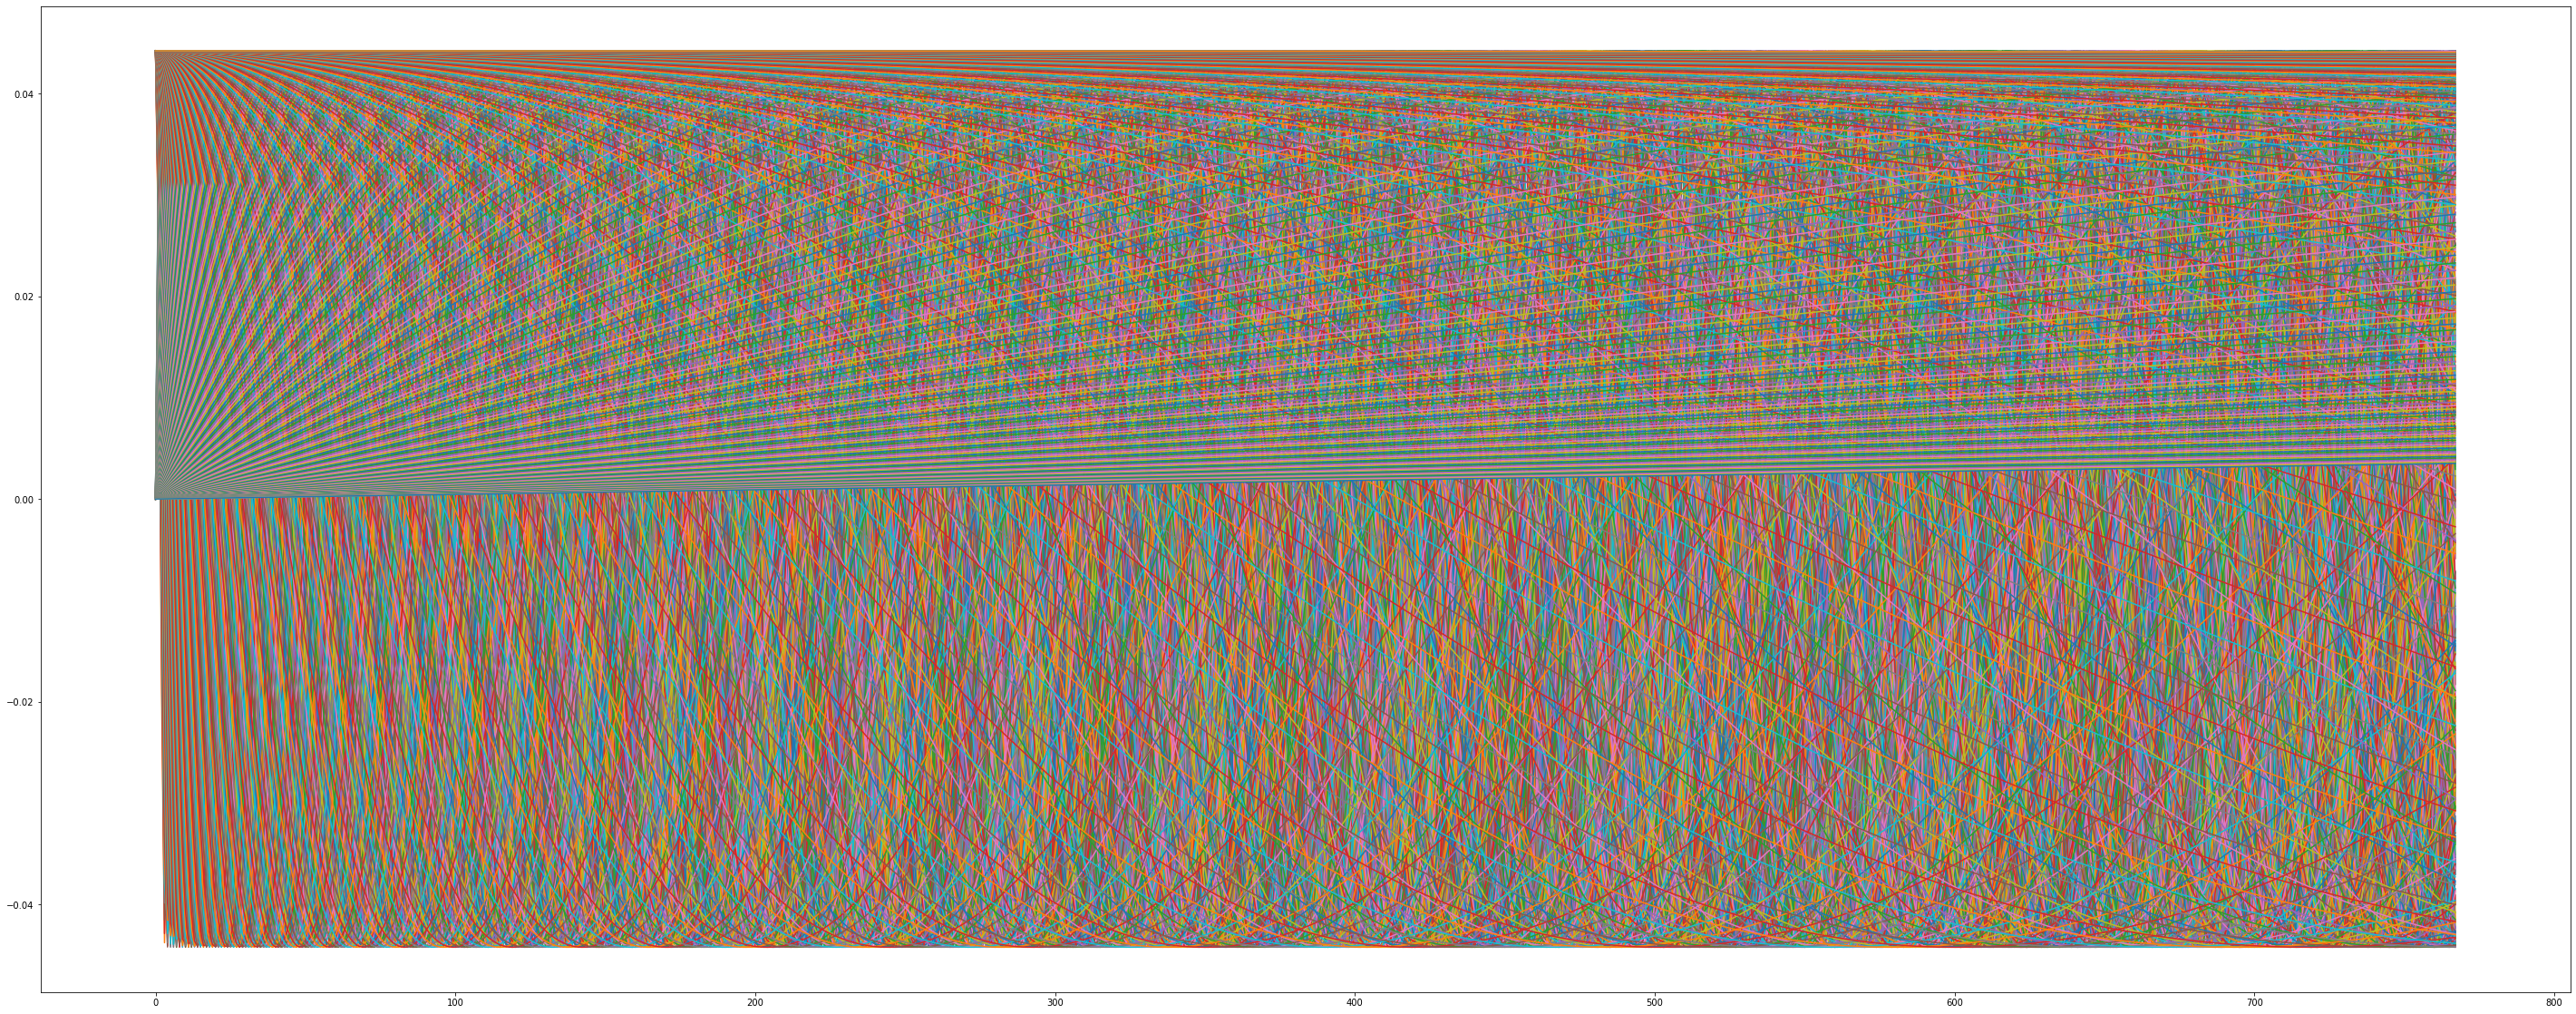

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
 
plt.figure(figsize=(50,20))
plt.plot(T)
plt.show()

---
# 1.5 Transformer Encoder
Let us now focus on the design of the Encoder mechanism which is demonstrated in Figure 4. In the Transformer paper, both encoder and decoder are composed of $\mathbf{N = 6}$ identical layers each, for a total of 12 layers. Each of the six encoder layers has two sub-layers: The first is a multi-head self-attention mechanism; the second is a simple, position-wise fully connected feed-forward network.  

The encoder’s purpose is to encode a source sentence into hidden state vectors; the decoder uses the last representation of the state vectors to predict characters in the target language. A single encoder block (one of the six) is illustrated below:


<center><figure>
    <img src="images/encoder1.png" width="500">
    <figcaption>Figure 4. Encoder Block</figcaption>
</figure></center>

---
# 1.6 What is Attention?

The backbone of the Transformer model is the "attention" mechanism. 

The intuition here is to think of attention in deep learning as an imitation of how a human might look at a visual scene. We don't typically scan everything in our view, but rather focus on the important features, depending on the context of the scene.  Similarly, in language we focus more on certain important words as they apply to other words, again based on context (see Figure 5 for an example).

An attention mechanism looks at an input sequence and decides, at each step, which other parts of the sequence are important. Attention in deep learning can be interpreted as a vector of importance weights. In the example below, we see that “ball” has strong attention to both “tennis” and “playing”, but “tennis” and “dog” are weakly connected.

<center><figure>
    <img src="images/attention1.png" width="600">
    <figcaption>Figure 5. Intuition for Attention Mechanism</figcaption>
</figure></center>

## 1.6.1 Self-Attention

The attention mechanism in the Transformer architecture is composed of three components: Query, Key and the Value. Each of these three of components have an associated weight matrix, which is trained through the optimization process.

The first step in calculating self-attention is to create three vectors from each of the encoders' input vectors (the embeddings). For each word, a Query vector, a Key vector, and a Value vector are created by multiplying the input by the appropriate weight matrix.

The attention function is defined as:

<img src="images/attentionfunction.png" width="400">

Let's see how Q, K, and V matrices are calculated. The Transformer views the encoded representation of the input as a set of key-value pairs, (K,V), both of dimension d<sub>k</sub>.

1. For each word, create a Query vector (q<sub>i</sub>), a Key vector (k<sub>i</sub>), and a Value vector (v<sub>i</sub>). These vectors are created by multiplying the embedding of the word by three matrices that are trained during the training process. 
2. Calculate the self-attention score for each word. The first word score is q<sub>1</sub>.k<sub>1</sub>, and for the second it is q<sub>1</sub>.k<sub>2</sub>.
3. Divide the scores by 8 (the square root of the dimension of the key vectors $\sqrt{𝑑_k}$ used in the paper).
4. Pass the result through a SoftMax operation.
5. Multiply each value vector by the SoftMax score: SoftMax x Value.
6. Sum up the weighted value vectors. This produces the output of the self-attention layer at this position (for the first word).

### Self-Attention Matrix Calculation

Let's explore self-attention matrix calculation in details.

The figure below illustrates the matrix calculation of self-attention (compare this with the attention function above). First we pack our embeddings into a matrix <b>X</b>. Each row of the matrix <b>X</b> contains the embedding values of the each word in the input sequence, i.e., </b>X</b> = [<b>x<sub>1</sub></b>, <b>x<sub>2</sub></b>, ..., <b>x<sub>n</sub></b>], where each <b>x<i><sub>i</sub></i></b> is a vector of the embedding values representing the word <i>i</i>.

<center><figure>
    <img src="images/attention2.png" width="500">
    <figcaption>Figure 6. Self-Attention Matrix Calculation Formula</figcaption>
</figure></center>

<b>Q</b> matrix is calculated by multiplying <b>X</b> with $W^Q_i \in \mathbb{R}^{d_{\text{model}} \times d_k}$, <b>K</b> matrix is calculated by multiplying <b>X</b> with $W^K_i \in \mathbb{R}^{d_{\text{model}} \times d_k}$, and <b>V</b> matrix is calculated by multiplying <b>X</b> with $W^V_i \in \mathbb{R}^{d_{\text{model}} \times d_v}$.


As we can see in the equation above, the Value vector is then rescaled by the results of the multiplication between Query and the Key. Through training this mechanism learns how to suppress certain part of the Value vector and how to reinforce other parts effectively allow the model to attend to certain parts of the text.

In the next notebook we will attempt to visualize this attention mechanism using a trained BERT model.

## 1.6.2 Multi-Head Attention

Are two heads better than one?  How about eight?  A refinement of self-attention is called “multi-headed” attention, which allows the model to focus on different positions or sub-spaces. 

There are h = 8 parallel attention layers, or heads, in the Transformer architecture. This means that there are eight version of self-attention, all running simultaneously.

<center><figure>
    <img src="images/multiheadattention.png" width="300">
    <figcaption>Figure 7. Multi-Head Attention</figcaption>
</figure></center>

More detail on this matrix calculation is provided in the optional [Multi-Head Attention](more_details/017_Multi-HeadAttention_Detail.ipynb) notebook.

---
# 1.7 Transformer Decoder

The decoder operates in a similar way to the encoder, but generates one word at a time, from left to right. It attends not only to the other previously generated words, but also to the final representations generated by the encoder. 

<center><figure>
    <img src="images/enc_dec_2.png" width="800">
    <figcaption>Figure 8. Decoder Block</figcaption>
</figure></center>

After finishing the encoding phase, the decoding phase starts. The decoder has a very similar structure to the encoder. In addition to the two sub-layers in each encoder layer, the decoder inserts a third sub-layer, which performs multi-head attention over the output of the encoder stack. Similar to the encoder, there are residual connections around each of the sub-layers, followed by layer normalization.

## 1.7.1 Masked Multi-Head Attention

You might have noticed the "masked multi-head attention" layer in the decoder in Figure 3. Self-attention layers in the decoder allow each position in the decoder to attend to all positions in the decoder up to and including that position. We need to prevent leftward information flow in the decoder to preserve the auto-regressive property. This masking, combined with fact that the output embeddings are offset by one position, ensures that the predictions for position <i>i</i> can depend only on the known outputs at positions less than <i>i</i>. In other words, masked multi-head attention is applied to prevent future words to be part of the attention.

What masking does is to zero-out the similarities between words and the words that appear after the source words ("in the future"). It simply removes such information, so it cannot be used by the model, only similarity to the preceding words is considered.

---
# 1.8 Visualization
The animation below illustrates how the Transformer is applied to machine translation. The Transformer starts by generating initial representations, or embeddings, for each word. These are represented by the unfilled circles. Then, using self-attention, it aggregates information from all of the other words, generating a new representation per word informed by the entire context, represented by the filled balls. This step is then repeated multiple times in parallel for all words, successively generating new representations.

<center><figure>
    <img src="https://3.bp.blogspot.com/-aZ3zvPiCoXM/WaiKQO7KRnI/AAAAAAAAB_8/7a1CYjp40nUg4lKpW7covGZJQAySxlg8QCLcBGAs/s1600/transform20fps.gif">
    <figcaption>Figure 9.  Transformer step-by-step sequence English-to-French translation. Credit: <a href="https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html">Google Blog</a></figcaption>
</figure></center>

---
<h2 style="color:green;">Congratulations!</h2>

You've learned that 
* Transformer "transformed" NMT by removing the need for RNNs
* Attention mechanisms are the key to the Transformer architecture
* Transformer encoders have six (default) stacked encoder blocks
* An encoder block includes two parts: self-attention and feed forward
* Embedding algorithms create vector representations of words
* Positional encoding is required because there are no RNNs for sequencing
* Multi-head attention allows the model to focus in multiple sub-spaces
* Decoders have three sublayers
* Decoders attend previously generated words and the final representations generated by the encoder
* Decoders use masked multi-head attention to prevent future words from being included

Whew!  That is a lot of information. Feel free to move forward to [2.0 BERT](020_BERT.ipynb) and return later for more study!

<a href="https://www.nvidia.com/dli"> <img src="images/DLI_Header.png" alt="Header" style="width: 400px;"/> </a>